# Introduction

## Dataset Description

The sales report dataset contains 8523 entries, each representing a unique sales record with twelve columns or features. Out of these features, seven are categorical variables, providing information in discrete categories, while four are numeric variables, conveying quantitative data. Notably, one of the numeric features represents dates, reducing the count of true numeric features to four.

Categorical Features (7):
1. **Item_Identifier**: A unique identifier for each item in the sales report.
2. **Item_Fat_Content**: Indicates the fat content category of the item (e.g., low fat, regular).
3. **Item_Type**: Categorizes the type or category of the item (e.g., dairy, bakery, vegetables).
4. **Outlet_Identifier**: A unique identifier for each sales outlet.
5. **Outlet_Establishment_Year**: Represents the year when the sales outlet was established.
6. **Outlet_Location_Type**: Describes the location type of the outlet (e.g., urban, rural, suburban).
7. **Outlet_Type**: Specifies the type of the outlet (e.g., supermarket, grocery store).

Numeric Features (4):
1. **Item_Weight**: Represents the weight of the item (contains missing values).
2. **Item_Visibility**: Reflects the percentage of total display area allocated to the item.
3. **Item_MRP**: Signifies the Maximum Retail Price (MRP) of the item.
4. **Outlet_Establishment_Date**: A date feature indicating when each outlet was established.

Missing Values:
1. **Item_Weight**: Some entries in the "Item_Weight" column have missing values.
2. **Outlet_Size**: The "Outlet_Size" column also contains missing values.

It is important to address the missing values in "Item_Weight" and "Outlet_Size" during data cleaning to ensure accurate and reliable analysis. The dataset's combination of categorical and numeric features provides valuable insights into the sales patterns and behaviors of various items and outlets.

## Problem Satement

The goal of this analysis is to understand the factors influencing sales in a retail business and predict sales for different items in various outlets. The dataset contains 8523 sales records with twelve features, including seven categorical features and four numeric features. Among the numeric features, one represents dates, and two others have missing values. By addressing data quality issues and exploring the relationships between different features, we aim to build a predictive model that can accurately forecast sales for different items in specific outlets.

## Hypothesis

Based on the provided dataset, we can formulate the following hypotheses:

1. Item_Type and Sales: The type of item is a significant factor influencing sales. Certain item types, such as perishable goods or high-demand products, might exhibit higher sales volumes than others.

2. Outlet_Location_Type and Sales: The location type of the outlet could impact sales. Outlets located in urban areas with higher population densities might experience higher sales due to increased customer footfall.

3. Outlet_Type and Sales: The type of outlet may influence sales. Larger outlets like supermarkets might generate higher sales compared to smaller grocery stores.

4. Item_MRP and Sales: The Maximum Retail Price (MRP) of an item might affect its sales. Lower-priced items could potentially sell more units than higher-priced items, especially for daily essentials.

5. Outlet_Establishment_Year and Sales: The year of establishment for an outlet might have an impact on its sales. Newly established outlets might take time to gain popularity and achieve higher sales figures.

6. Item_Visibility and Sales: The percentage of total display area allocated to an item could influence its sales. Items with higher visibility might attract more customers and result in increased sales.

7. Item_Weight and Sales: The weight of an item might have a relationship with its sales. Customers' preferences for lighter or heavier products could influence their purchasing behavior.

By testing these hypotheses through exploratory data analysis and building predictive models, we aim to gain insights into the factors that drive sales in the retail business and develop a robust model for sales prediction.

# Loading Packages & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils


from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder

In [2]:
!pwd

/home/nikin/repos/BigMart-Sales-Analysis


In [3]:
sales = pd.read_csv("./dataset/Train.csv")

In [4]:
test = pd.read_csv("./dataset/Test.csv")

# Data Structure & Content

In [5]:
utils.info(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1559
1	Item_Weight              	1463        float64	416
2	Item_Fat_Content         	0           object	5
3	Item_Visibility          	0           float64	7880
4	Item_Type                	0           object	16
5	Item_MRP                 	0           float64	5938
6	Outlet_Identifier        	0           object	10
7	Outlet_Establishment_Year	0           int64	9
8	Outlet_Size              	2410        object	4
9	Outlet_Location_Type     	0           object	3
10	Outlet_Type              	0           object	4
11	Item_Outlet_Sales        	0           float64	3493
dtypes: object(7), float64(4), int64(1)
memory usage: 799.2+ KB


In the above data, the `'Item_Outlet_Sales' (float64)` is the dependent variable.

In [6]:
dependent_variable = 'Item_Outlet_Sales'

In [7]:
utils.info(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1543
1	Item_Weight              	976         float64	411
2	Item_Fat_Content         	0           object	5
3	Item_Visibility          	0           float64	5277
4	Item_Type                	0           object	16
5	Item_MRP                 	0           float64	4402
6	Outlet_Identifier        	0           object	10
7	Outlet_Establishment_Year	0           int64	9
8	Outlet_Size              	1606        object	4
9	Outlet_Location_Type     	0           object	3
10	Outlet_Type              	0           object	4
dtypes: object(7), float64(3), int64(1)
memory usage: 488.3+ KB


# Data Cleaning/Feature Engineering

## Handling Inconsistent Data

The column Item_Fat_Content had some inconsistent entires.

In [8]:
list(sales['Item_Fat_Content'].unique())

['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

- **Assumption#1** In the given DataFrame, it's probable that 'Low Fat', 'low fat', and 'LF' all refer to the same category. Similarly, 'Regular' and 'reg' probably also represent the same category as well. Therefore, we should consider these different representations as equivalent for data analysis and processing purposes.

In [9]:
column = 'Item_Fat_Content'
sales[column] = sales[column].replace(['low fat', 'LF'], 'Low Fat')
sales[column] = sales[column].replace('reg', 'Regular')
# Same for the test set
test[column] = test[column].replace(['low fat', 'LF'], 'Low Fat')
test[column] = test[column].replace('reg', 'Regular')

In [10]:
list(sales['Item_Fat_Content'].unique())

['Low Fat', 'Regular']

## Zero Handling

In [11]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The presence of zeros in "Item_Visibility" can be problematic. We will convert this numerical `'Item_Visibility'` feature into multiple binary features called bins based on the range.  We will create 5 bins. But first, we will scale it so it becomes easire to define a range.

In [12]:
visibility_values = sales['Item_Visibility'].values.reshape(-1,1)
sales['Item_Visibility'] = MinMaxScaler().fit_transform(visibility_values)

In [13]:
bins_range = [0, 0.05, 0.1, 0.15, 0.5, 1]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
sales['Item_Visibility_Category'] = pd.cut(sales['Item_Visibility'], bins=bins_range, labels=labels, include_lowest=True)

Now let's drop the 'Item_Visibility'.

In [14]:
sales.drop(['Item_Visibility'], axis=1, inplace=True)

In [15]:
# Repeat for the test set.
visibility_values = test['Item_Visibility'].values.reshape(-1,1)
test['Item_Visibility'] = MinMaxScaler().fit_transform(visibility_values)
test['Item_Visibility_Category'] = pd.cut(test['Item_Visibility'], bins=bins_range, labels=labels, include_lowest=True)
test.drop(['Item_Visibility'], axis=1, inplace=True)

In [16]:
utils.info(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1559
1	Item_Weight              	1463        float64	416
2	Item_Fat_Content         	0           object	2
3	Item_Type                	0           object	16
4	Item_MRP                 	0           float64	5938
5	Outlet_Identifier        	0           object	10
6	Outlet_Establishment_Year	0           int64	9
7	Outlet_Size              	2410        object	4
8	Outlet_Location_Type     	0           object	3
9	Outlet_Type              	0           object	4
10	Item_Outlet_Sales        	0           float64	3493
11	Item_Visibility_Category 	0           category	5
dtypes: object(7), float64(3), int64(1), category(1)
memory usage: 741.1+ KB


In [17]:
utils.info(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1543
1	Item_Weight              	976         float64	411
2	Item_Fat_Content         	0           object	2
3	Item_Type                	0           object	16
4	Item_MRP                 	0           float64	4402
5	Outlet_Identifier        	0           object	10
6	Outlet_Establishment_Year	0           int64	9
7	Outlet_Size              	1606        object	4
8	Outlet_Location_Type     	0           object	3
9	Outlet_Type              	0           object	4
10	Item_Visibility_Category 	0           category	5
dtypes: object(7), float64(2), int64(1), category(1)
memory usage: 449.7+ KB


## Missing Value Treatment

1. Item_Weight: Some entries in the "Item_Weight" column have missing values.
1. Outlet_Size: The "Outlet_Size" column also contains missing values.

> Upon thorough examination of the data, it was observed that each distinct 'Outlet_Identifier' was associated with only one 'Outlet_Size'. Similarly, each unique 'Item_Identifier' had a corresponding single value for 'Item_Weight'.

### Outlet_Size

Let's run a bivariate analysis to find the # of unique "Outlet_Size" for each unique "Outlet_Identifier".

In [18]:
nunique_OutletSize_per_Outlet_Identifier = utils.count_unique_values(sales, 'Outlet_Size', 'Outlet_Identifier')

  Outlet_Identifier  nunique Outlet_Size
0            OUT010                    0
1            OUT013                    1
2            OUT017                    0
3            OUT018                    1
4            OUT019                    1
5            OUT027                    1
6            OUT035                    1
7            OUT045                    0
8            OUT046                    1
9            OUT049                    1


In [19]:
# Filter the Outlet_Identifier values with nunique equal to 0
x = nunique_OutletSize_per_Outlet_Identifier
trueMissingOutletSize = x[x['Outlet_Size'] == 0]['Outlet_Identifier'].to_list()
trueMissingOutletSize

['OUT010', 'OUT017', 'OUT045']

We can see that only three outlets 'OUT010', 'OUT017', and 'OUT045' have true missing Outlet_Size data points.

How many of the NULL data points belong to either of these?

In [20]:
sales[sales['Outlet_Identifier'].isin(trueMissingOutletSize)].shape

(2410, 12)

It becomes clear that all 2410 missing `'Outlet_Size'` data points belong to these 3 stores.

**Let's see the # of null points for each outlet.**

In [21]:
nmissingOutletSize = [sales[sales['Outlet_Identifier'] == item] ['Outlet_Size'].isnull().sum() for item in trueMissingOutletSize]
dict(zip(trueMissingOutletSize, nmissingOutletSize))

{'OUT010': 555, 'OUT017': 926, 'OUT045': 929}

Let's take a brief look at missingOutletSizeRows.

In [22]:
missingOutletSizeRows = sales[sales['Outlet_Size'].isnull()]
missingOutletSizeRows.loc[:, 'Outlet_Identifier':'Outlet_Type'].head(3)

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,OUT010,1998,NaN,Tier 3,Grocery Store
8,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,OUT017,2007,NaN,Tier 2,Supermarket Type1


We can run a few bivariate analyses to draw conclusions about Outlet_Size.

**Q:** What size are other Tier 2 and Tier 3 stores?

In [23]:
pd.crosstab(sales['Outlet_Size'], sales['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


**Q:** What size are other Grocery stores, Supermarket Type1 stores?

In [24]:
pd.crosstab(sales['Outlet_Size'], sales['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


**Q:** What other Tier do other Grocery stores, SupermarketType1 fall in?

In [25]:
pd.crosstab(sales['Outlet_Location_Type'], sales['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


- **Assumption#2** Since all other Tier 2 Supermaket Type 1 stores are also 'Small', it is safe to assume both 
'OUT017' and 'OUT045'are also small.
- **Assumption#3** Since all Tier 1 Grocery Store are small, we assume Tier 3 Grocery stores are at least 'Medium'.

In [26]:
outlet_size = {
    'OUT017': 'Small',
    'OUT045': 'Small',
    'OUT010' : 'Medium' 
}

Now we can look in the `outlet_size` table for the missing `'Outlet_Size'` values.

In [27]:
sales['Outlet_Size'] = sales['Outlet_Size'].fillna(sales['Outlet_Identifier'].map(outlet_size))
# Verify
sales['Outlet_Size'].isnull().sum()

0

In [28]:
# Repeat for the test set
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Identifier'].map(outlet_size))
# Verify it is fixed for test set too.
test['Outlet_Size'].isnull().sum()

0

### Item_Weight

Let's run another bivariate analysis to find the # of unique "Item_Weight" for each unique Item_Identifer.

In [29]:
nuniqueWeights = utils.count_unique_values(sales, 'Item_Weight', 'Item_Identifier')

     Item_Identifier  nunique Item_Weight
0              DRA12                    1
1              DRA24                    1
2              DRA59                    1
3              DRB01                    1
4              DRB13                    1
...              ...                  ...
1554           NCZ30                    1
1555           NCZ41                    1
1556           NCZ42                    1
1557           NCZ53                    1
1558           NCZ54                    1

[1559 rows x 2 columns]


In [30]:
nuniqueWeights['Item_Weight'].value_counts().reset_index()

,index,Item_Weight
0,1,1555
1,0,4


Clearly, each 'Item_Identifier' had zero or at most one Item_Weight. Moreover, 1555 items have only one unique 'Item_Weight' value and four items seem to have None.

The key takeway from this is that **there can only be one** 'Item_Weight' **for each** unique item.

In [31]:
trueMissingWeights =  nuniqueWeights[nuniqueWeights['Item_Weight'] == 0]['Item_Identifier'].to_list()
trueMissingWeights

['FDE52', 'FDK57', 'FDN52', 'FDQ60']

In [32]:
sales[sales['Item_Identifier'].isin(trueMissingWeights)].shape

(4, 12)

We have 2402 missing Item_Weight data points but only four of them are truly missing. Each of these four entires only seem to occupy one row in the dataset. So 2398 missing Item_Weights can be figured out by just looking in the rows where Item_Weight is not missing.

In [33]:
validItemWeightRows = sales.dropna(subset=['Item_Weight'])
item_weights = validItemWeightRows.set_index('Item_Identifier')['Item_Weight'].to_dict()
utils.sliceDict(item_weights, 3)

{'FDA15': 9.3, 'DRC01': 5.92, 'FDN15': 17.5}

**Assumption#4** We will replace the actual missing weights with the mean value.

In [34]:
weightMean = sales['Item_Weight'].mean()
item_weights.update({item: weightMean for item in trueMissingWeights})

Now we can look in the `item_weights` table for the missing `'Item_Weight'` values.

In [35]:
sales['Item_Weight'] = sales['Item_Weight'].fillna(sales['Item_Identifier'].map(item_weights))

In [36]:
# Repeat for the test set
weightMean = test['Item_Weight'].mean()
item_weights.update({item: weightMean for item in trueMissingWeights})
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Identifier'].map(item_weights))
# Verify
test['Item_Weight'].isnull().sum()

0

Now that we have fixed the Missing values in our data, let's create new features out of the existing ones.

First We will create a new feature "Item_Type_Frequency" representing the count of each "Item_Type" in the dataset. This can capture the variety of items sold in each category.

In [37]:
item_type_frequency = (sales['Item_Type'].value_counts()).to_dict()
sales['Item_Type_Frequency'] = sales['Item_Type'].map(item_type_frequency)
sales.loc[:, ['Item_Type', 'Item_Type_Frequency']].head(5)

,Item_Type,Item_Type_Frequency
0,Dairy,682
1,Soft Drinks,445
2,Meat,425
3,Fruits and Vegetables,1232
4,Household,910


In [38]:
# Repeat for test set
item_type_frequency = (test['Item_Type'].value_counts()).to_dict()
test['Item_Type_Frequency'] = test['Item_Type'].map(item_type_frequency)
test.loc[:, ['Item_Type', 'Item_Type_Frequency']].head(5)

,Item_Type,Item_Type_Frequency
0,Snack Foods,789
1,Dairy,454
2,Others,111
3,Snack Foods,789
4,Dairy,454


We can crate another feature 'MRP_Per_Unit_Weight' which will indicate the price per unit weight for each itema. This can help capture different pricing strategies based on weight.

In [39]:
sales['MRP_Per_Unit_Weight'] = sales['Item_MRP'] / sales['Item_Weight']

In [40]:
# Repeat for test set
test['MRP_Per_Unit_Weight'] = test['Item_MRP'] / test['Item_Weight']

'Outlet_Age' can be another age which is a count of elasped years since outlet establishment. Item Type Outlet Mean Sales: Calculate the mean sales of each "Item_Type" within each outlet and create a new feature representing this information. This can help capture the relative performance of different item types in each outlet.

In [41]:
sales['Outlet_Age'] = 2013 - sales['Outlet_Establishment_Year']

In [42]:
# Repeat for test set
test['Outlet_Age'] = 2013 - test['Outlet_Establishment_Year']

Now let's drop the 'Outlet_Establishment_Year'.

In [43]:
utils.info(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1559
1	Item_Weight              	0           float64	416
2	Item_Fat_Content         	0           object	2
3	Item_Type                	0           object	16
4	Item_MRP                 	0           float64	5938
5	Outlet_Identifier        	0           object	10
6	Outlet_Establishment_Year	0           int64	9
7	Outlet_Size              	0           object	3
8	Outlet_Location_Type     	0           object	3
9	Outlet_Type              	0           object	4
10	Item_Outlet_Sales        	0           float64	3493
11	Item_Visibility_Category 	0           category	5
12	Item_Type_Frequency      	0           int64	16
13	MRP_Per_Unit_Weight      	0           float64	8006
14	Outlet_Age               	0           int64	9
dtypes: object(7), float64(4), int64(3), ca

In [44]:
utils.info(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 14 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1543
1	Item_Weight              	0           float64	412
2	Item_Fat_Content         	0           object	2
3	Item_Type                	0           object	16
4	Item_MRP                 	0           float64	4402
5	Outlet_Identifier        	0           object	10
6	Outlet_Establishment_Year	0           int64	9
7	Outlet_Size              	0           object	3
8	Outlet_Location_Type     	0           object	3
9	Outlet_Type              	0           object	4
10	Item_Visibility_Category 	0           category	5
11	Item_Type_Frequency      	0           int64	16
12	MRP_Per_Unit_Weight      	0           float64	5452
13	Outlet_Age               	0           int64	9
dtypes: object(7), float64(3), int64(3), category(1)
memory usage: 582.9+ KB


# Exploratory Data Analysis

## Univariate Analysis

Let's look at the distribution of numerical features.

### Numeric Feature Distribution

In [45]:
numericalFeatures = sales.select_dtypes(include='number').columns.to_list()

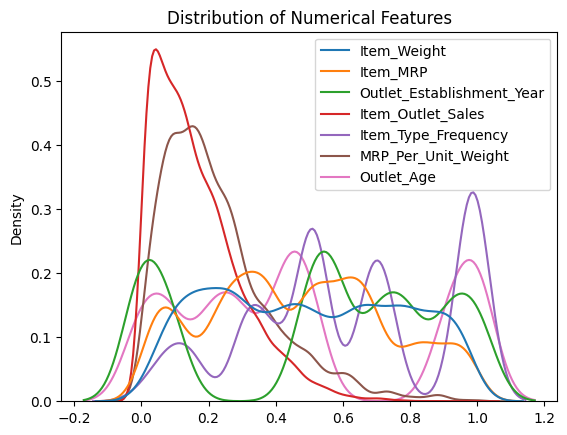


Statistical Overview of Numerical Features:



,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Frequency,MRP_Per_Unit_Weight,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875412,140.992782,1997.831867,2181.288914,780.170949,12.718860,15.168133
std,4.645008,62.275067,8.371760,1706.499616,341.615588,8.025989,8.371760
min,4.555000,31.290000,1985.000000,33.290000,64.000000,1.686016,4.000000
25%,8.785000,93.826500,1987.000000,834.247400,520.000000,6.747596,9.000000
50%,12.650000,143.012800,1999.000000,1794.331000,682.000000,10.963003,14.000000
75%,16.850000,185.643700,2004.000000,3101.296400,1200.000000,16.263237,26.000000
max,21.350000,266.888400,2009.000000,13086.964800,1232.000000,50.775731,28.000000


In [46]:
utils.visualizeNumericalFeatures(sales, numericalFeatures, scaler=MinMaxScaler())

Some features have a really high max value compared to other features. Since, gradients are directly proptional to the value of x (features), we need to transform dataset to account for different scales.

Also, it looks like 'Item_Outlet_Sales' might have some outliers. Let's look at box plots to confirm this.

### Outlier Handling

In [47]:
import seaborn as sns

In [48]:
from scipy.stats import zscore

def checkOutliers(dataFrame, numericalFeatures):
    plt.figure(figsize = (12,6))
    for i, feature in enumerate(numericalFeatures):
        plt.subplot(3, 3, i+1)  # Create a subplot for each column
        sns.boxplot(x=feature, data=dataFrame)
        outlier_count =  getOutliersCount(dataFrame, feature)
        print(f"Outliers count in {feature} = {outlier_count}" )

def getOutliersCount(dataframe, feature):
    z_scores = zscore(sales[feature])
    outliers = sales[abs(z_scores) > 3]
    return outliers.shape[0]
    
def removeOutliers(dataframe, feature):
    Q1= dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    dataframe = dataframe[(dataframe[feature] > lower) & (dataframe[feature] < upper)]
    return dataframe

Outliers count in Item_Weight = 0
Outliers count in Item_MRP = 0
Outliers count in Outlet_Establishment_Year = 0
Outliers count in Item_Outlet_Sales = 90
Outliers count in Item_Type_Frequency = 0
Outliers count in MRP_Per_Unit_Weight = 133
Outliers count in Outlet_Age = 0


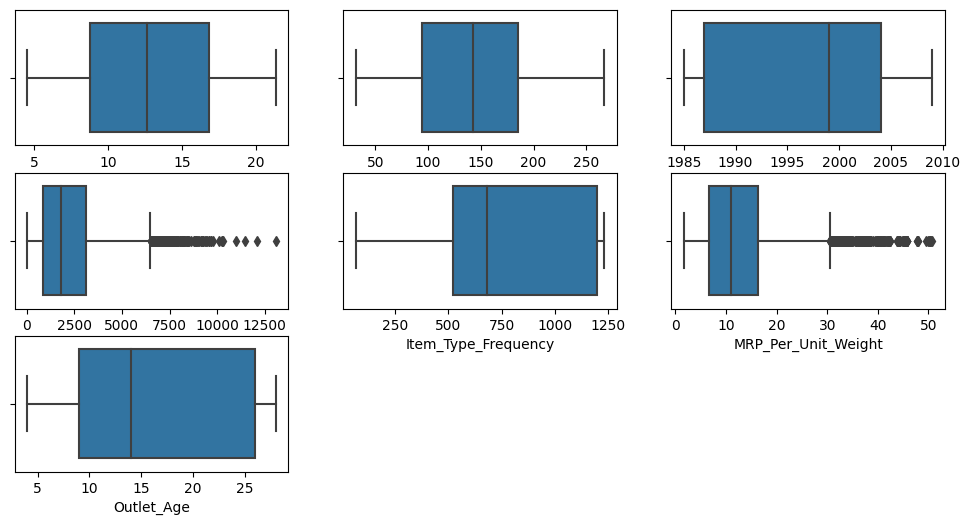

In [49]:
checkOutliers(sales, numericalFeatures)

In [50]:
sales = removeOutliers(sales, 'Item_Outlet_Sales')

In [51]:
sales = removeOutliers(sales, 'MRP_Per_Unit_Weight')

In [52]:
print(getOutliersCount(sales, 'Item_Outlet_Sales'))

9


'Item_Outlet_Sales' still seems to have some outliers so we will run removeOutliers once more.

In [53]:
sales = removeOutliers(sales, 'Item_Outlet_Sales')

In [54]:
getOutliersCount(sales, 'Item_Outlet_Sales')

0

In [55]:
getOutliersCount(sales, 'MRP_Per_Unit_Weight')

0

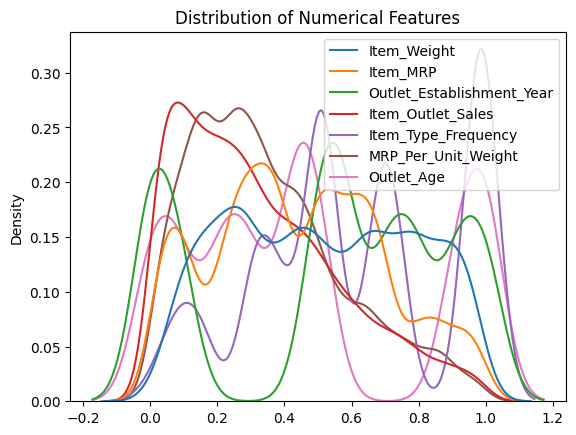


Statistical Overview of Numerical Features:



,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Frequency,MRP_Per_Unit_Weight,Outlet_Age
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,13.139504,135.098553,1997.958480,1987.410571,780.100780,11.552668,15.041520
std,4.538977,59.732513,8.306467,1440.113143,341.093822,6.381772,8.306467
min,4.555000,31.290000,1985.000000,33.290000,64.000000,1.686016,4.000000
25%,9.100000,90.551400,1987.000000,792.302000,520.000000,6.454109,9.000000
50%,13.000000,129.349400,1999.000000,1695.459700,682.000000,10.399266,14.000000
75%,17.100000,178.566000,2004.000000,2896.396450,1200.000000,15.266528,26.000000
max,21.350000,266.888400,2009.000000,6114.707200,1232.000000,30.150053,28.000000


In [56]:
utils.visualizeNumericalFeatures(sales, numericalFeatures)

In [57]:
# Repeat for the test set
test = removeOutliers(test, 'MRP_Per_Unit_Weight')
print(getOutliersCount(test, 'MRP_Per_Unit_Weight'))

0


In [58]:
numericalFeaturesTest = [x for x in numericalFeatures if x != dependent_variable]
numericalFeaturesTest

['Item_Weight',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Frequency',
 'MRP_Per_Unit_Weight',
 'Outlet_Age']

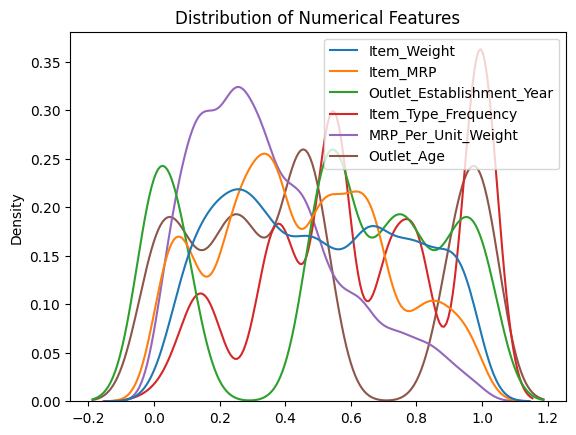


Statistical Overview of Numerical Features:



,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Type_Frequency,MRP_Per_Unit_Weight,Outlet_Age
count,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000
mean,12.961790,137.323878,1997.861346,516.040088,11.876379,15.138654
std,4.548699,60.249905,8.365407,218.365782,6.503689,8.365407
min,4.555000,31.990000,1985.000000,25.000000,1.665236,4.000000
25%,8.985000,92.488300,1987.000000,338.000000,6.768305,9.000000
50%,12.650000,130.199400,1999.000000,454.000000,10.747374,14.000000
75%,16.750000,181.763400,2004.000000,781.000000,15.601120,26.000000
max,21.350000,266.588400,2009.000000,789.000000,30.713444,28.000000


In [59]:

utils.visualizeNumericalFeatures(test, numericalFeaturesTest)

We can see that the distribution of numerical features is the training set are analogous to those in the test set.

No data of stores between 1987 and 1998?

Now let's run univariate analysis for categorical features. We will plot the frequency of some (but not all) categorical features.

### Categorical Feature Analysis

In [60]:
categoricalFeatures = sales.select_dtypes(include=['object', 'category']).columns.to_list()


In [61]:
categorical_columns = [x for x in categoricalFeatures if x not in ['Item_Identifier', 'Outlet_Identifier']]

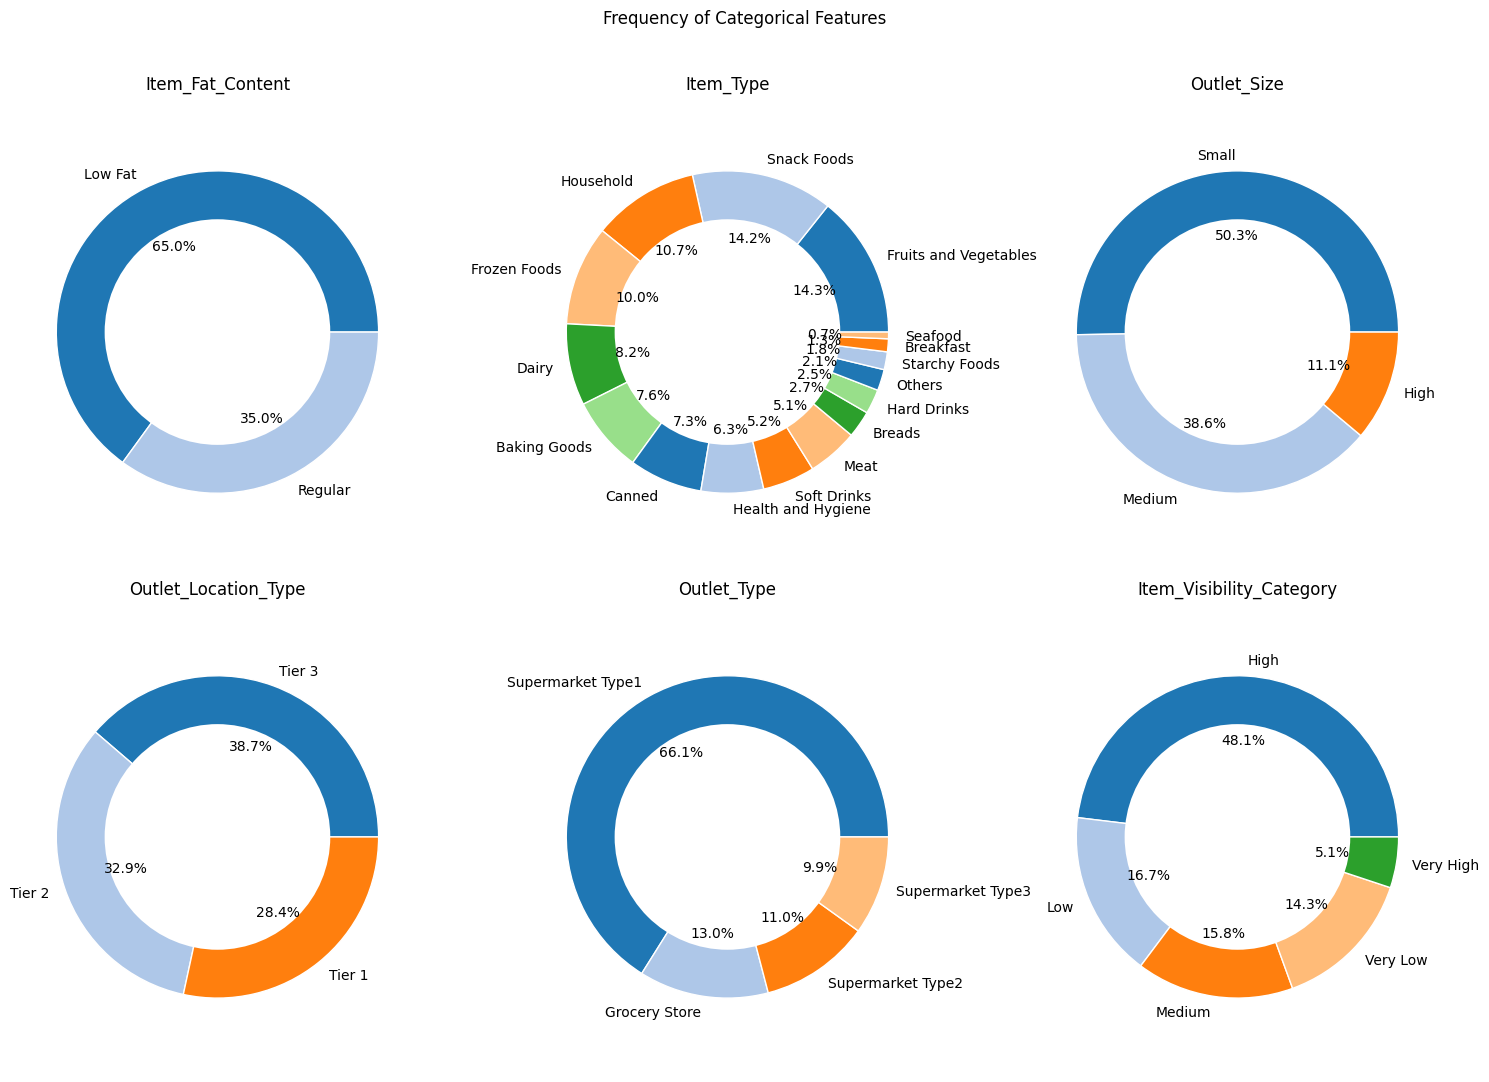


Statistical Overview of Categorical Features:



,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,7948,7948,7948,7948,7948,7948,7948
unique,1493,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT013,Small,Tier 3,Supermarket Type1
freq,10,5166,1137,883,3995,3076,5252


In [62]:
utils.visualizeFrequency(sales, categorical_columns, style='donut')

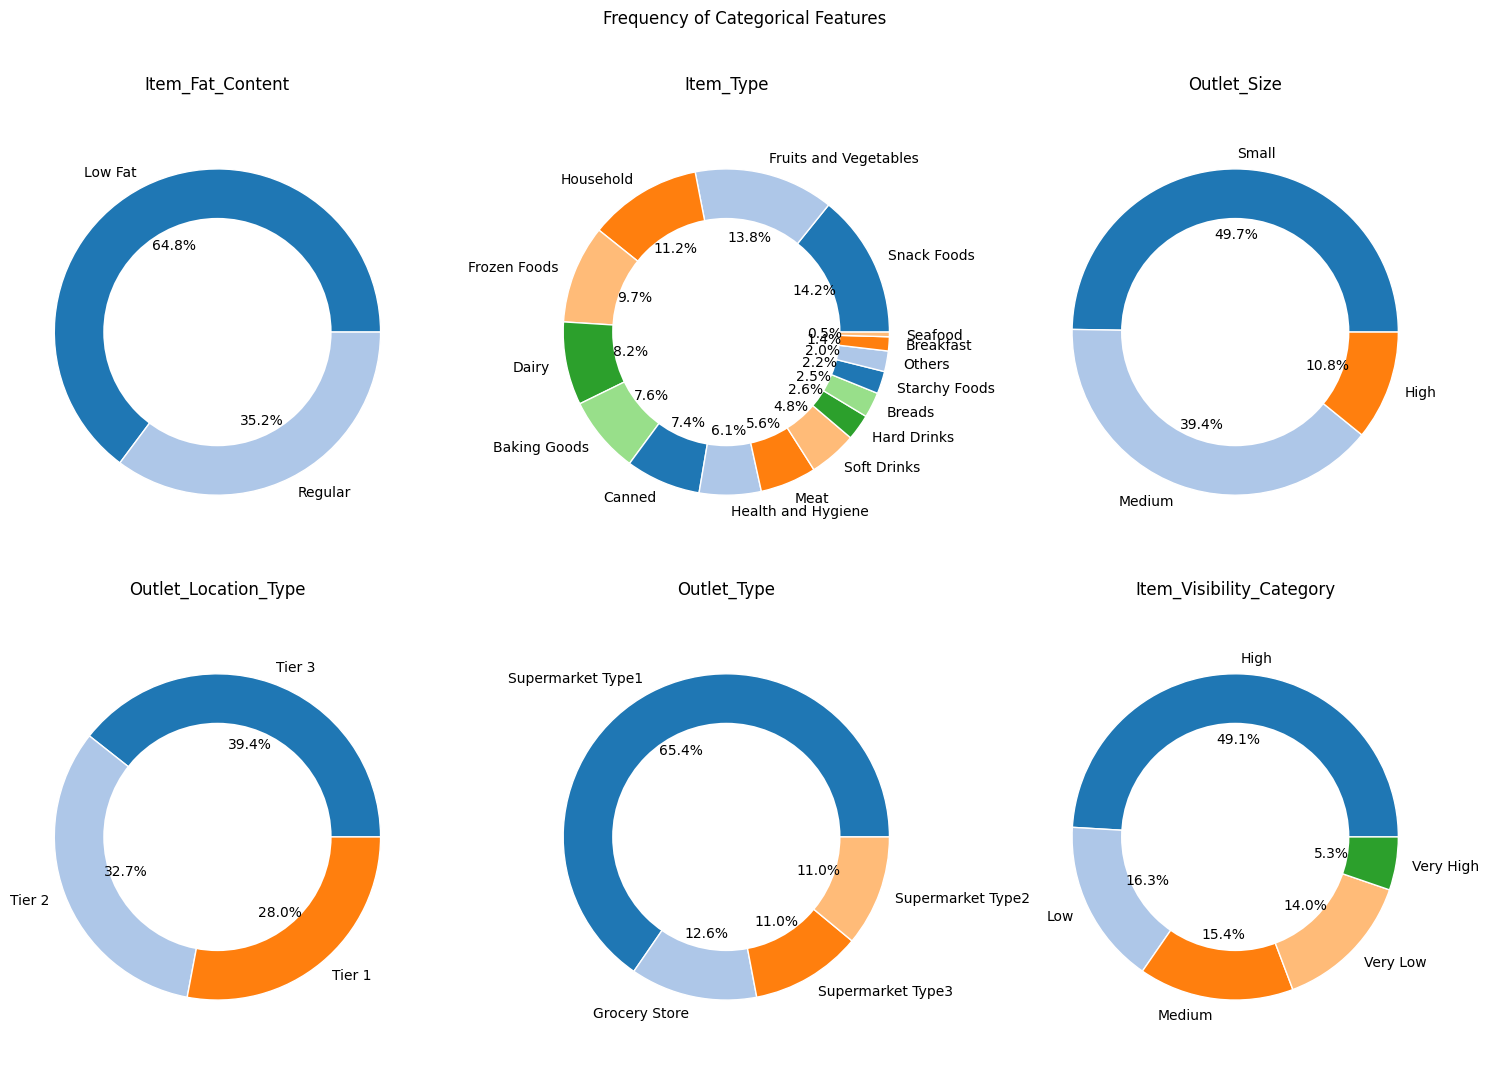


Statistical Overview of Categorical Features:



,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5438,5438,5438,5438,5438,5438,5438
unique,1485,2,16,10,3,3,4
top,FDK57,Low Fat,Snack Foods,OUT027,Small,Tier 3,Supermarket Type1
freq,8,3524,773,599,2705,2141,3557


In [63]:
utils.visualizeFrequency(test, categorical_columns, style='donut')

We can see that the distribution of categorical features are also fairly same in the test and the training set.

##  Bivariate Analysis (Training set)

### Correlation Analysis of Sales

In [64]:
sales.corr(numeric_only=True)

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Frequency,MRP_Per_Unit_Weight,Outlet_Age
Item_Weight,1.000000,0.114816,-0.011548,0.051287,0.055039,-0.576520,0.011548
Item_MRP,0.114816,1.000000,0.022509,0.551811,0.050454,0.674351,-0.022509
Outlet_Establishment_Year,-0.011548,0.022509,1.000000,0.006260,-0.000160,0.025051,-1.000000
Item_Outlet_Sales,0.051287,0.551811,0.006260,1.000000,0.036076,0.382135,-0.006260
Item_Type_Frequency,0.055039,0.050454,-0.000160,0.036076,1.000000,-0.000687,0.000160
MRP_Per_Unit_Weight,-0.576520,0.674351,0.025051,0.382135,-0.000687,1.000000,-0.025051
Outlet_Age,0.011548,-0.022509,-1.000000,-0.006260,0.000160,-0.025051,1.000000


We can make the following generalizations:

- There is a moderate positive correlation between "Item_MRP" and "Item_Outlet_Sales," suggesting that higher MRPs are associated with higher sales.
- There is a moderate positive correlation between "MRP_Per_Unit_Weight" and "Item_Outlet_Sales," indicating that higher prices per unit weight are associated with higher sales.

For other variables ("Item_Weight," "Outlet_Establishment_Year," "Item_Type_Frequency," and "Outlet_Age"), the correlations are weak or close to zero, and therefore, we cannot make strong generalizations about their associations with "Item_Outlet_Sales" based on the correlation alone.


### Sales Distribution by Categories

In [65]:
utils.info(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 15 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1493
1	Item_Weight              	0           float64	389
2	Item_Fat_Content         	0           object	2
3	Item_Type                	0           object	16
4	Item_MRP                 	0           float64	5608
5	Outlet_Identifier        	0           object	10
6	Outlet_Establishment_Year	0           int64	9
7	Outlet_Size              	0           object	3
8	Outlet_Location_Type     	0           object	3
9	Outlet_Type              	0           object	4
10	Item_Outlet_Sales        	0           float64	3192
11	Item_Visibility_Category 	0           category	5
12	Item_Type_Frequency      	0           int64	16
13	MRP_Per_Unit_Weight      	0           float64	7474
14	Outlet_Age               	0           int64	9
dtypes: object(7), float64(4), int64(3), ca

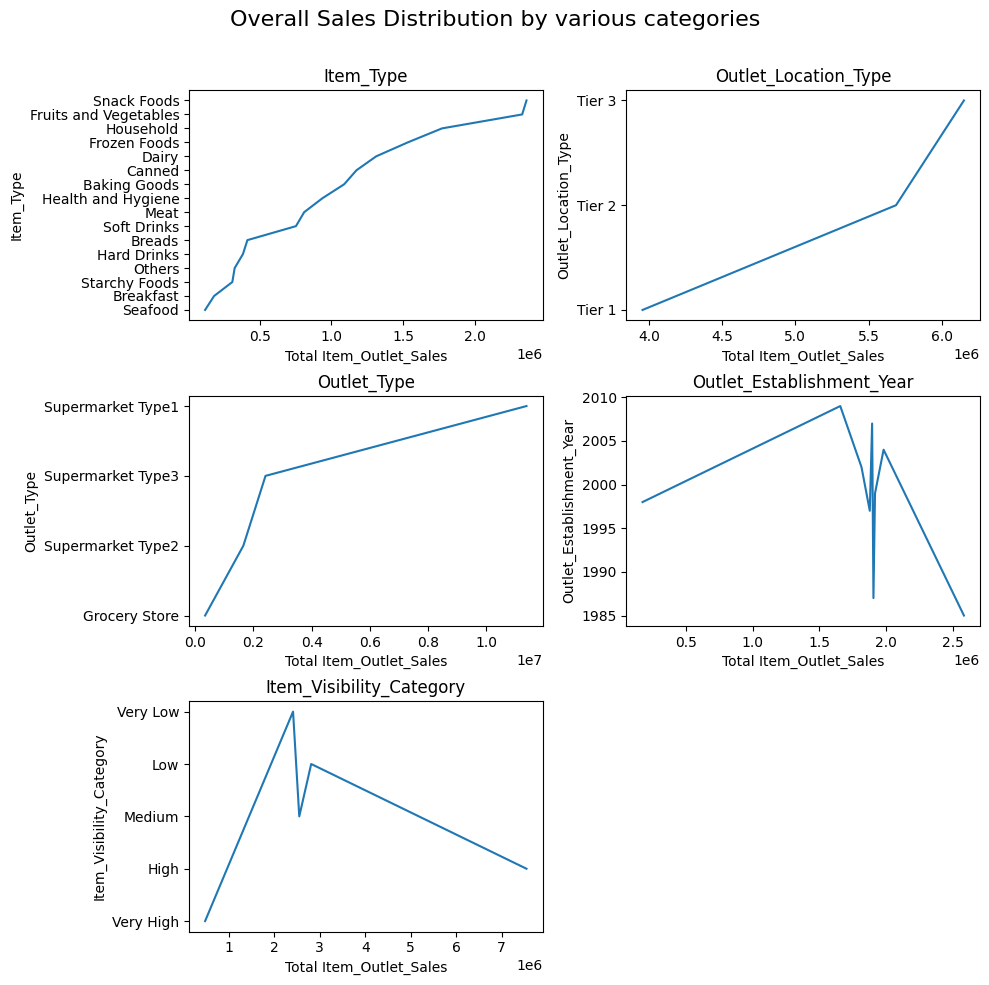

In [66]:
categories = ['Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year', 'Item_Visibility_Category']

plt.figure(figsize=(10, 10))
for i, category in enumerate(categories):
    plt.subplot(3, 2, i+1)
    utils.getDistributionByCategory(sales, category, 'Item_Outlet_Sales')
plt.tight_layout()
plt.suptitle('Overall Sales Distribution by various categories', fontsize=16)
plt.subplots_adjust(top=0.9)

# Dataset Splitting

Separate dependent and independent variables.

In [67]:
x_Train = sales.drop(columns=['Item_Outlet_Sales'], axis=1)
y_Train = sales['Item_Outlet_Sales'].to_frame()

In [68]:
x_Train.shape

(7948, 14)

In [69]:
test.shape

(5438, 14)

In [70]:
# Remove the dependent variable from the feature list
numericalFeatures.remove(dependent_variable)
numericalFeatures

['Item_Weight',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Frequency',
 'MRP_Per_Unit_Weight',
 'Outlet_Age']

In [71]:
utils.info(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 14 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1485
1	Item_Weight              	0           float64	388
2	Item_Fat_Content         	0           object	2
3	Item_Type                	0           object	16
4	Item_MRP                 	0           float64	4241
5	Outlet_Identifier        	0           object	10
6	Outlet_Establishment_Year	0           int64	9
7	Outlet_Size              	0           object	3
8	Outlet_Location_Type     	0           object	3
9	Outlet_Type              	0           object	4
10	Item_Visibility_Category 	0           category	5
11	Item_Type_Frequency      	0           int64	16
12	MRP_Per_Unit_Weight      	0           float64	5216
13	Outlet_Age               	0           int64	9
dtypes: object(7), float64(3), int64(3), category(1)
memory usage: 600.3+ KB


In [72]:
utils.info(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 15 columns):
 # 	Column				Null_Count  Dtype	Unique_Count
---	------				----------  -----	------------
0	Item_Identifier          	0           object	1493
1	Item_Weight              	0           float64	389
2	Item_Fat_Content         	0           object	2
3	Item_Type                	0           object	16
4	Item_MRP                 	0           float64	5608
5	Outlet_Identifier        	0           object	10
6	Outlet_Establishment_Year	0           int64	9
7	Outlet_Size              	0           object	3
8	Outlet_Location_Type     	0           object	3
9	Outlet_Type              	0           object	4
10	Item_Outlet_Sales        	0           float64	3192
11	Item_Visibility_Category 	0           category	5
12	Item_Type_Frequency      	0           int64	16
13	MRP_Per_Unit_Weight      	0           float64	7474
14	Outlet_Age               	0           int64	9
dtypes: object(7), float64(4), int64(3), ca

# Preprocessing

In [73]:
from scipy.sparse import issparse
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [74]:
def preprocessFeatures(X, numericalFeatures, categoricalFeatures, needsFitting=False, 
                       numericalScaler=MinMaxScaler(), categoricalScaler=OneHotEncoder()):

    # Cast as numerical data
    for c in numericalFeatures:
        X[c] = X[c].astype(np.float64)

    # Cast as string
    for c in categoricalFeatures:
        X[c] = X[c].astype(str)

    if needsFitting:
        # Need to fit scaler!
        numericalScaler.fit(X[numericalFeatures])
        categoricalScaler.fit(X[categoricalFeatures])

    print (f"Shape of X: {X.shape}")

    X_numerical = numericalScaler.transform(X[numericalFeatures])
    print (f"Shape of numerical X: {X_numerical.shape}")

    X_categorical = categoricalScaler.transform(X[categoricalFeatures])

    """scipy.sparse.issparse(x) checks if x is a sparse matrix. A sparse
  matrix is a matrix that has majority of its elements equal to zero.
  """
    if issparse(X_categorical):
        X_categorical = X_categorical.toarray()
    print (f"Shape of categorical X: {X_categorical.shape}")

    X_transformed = np.hstack((X_numerical, X_categorical))
    print (f"Shape of final transformed X: {X_transformed.shape}")

    return X_transformed

In [75]:
# Fit scaler on training data!
xTrain = preprocessFeatures(x_Train, numericalFeatures, categoricalFeatures, needsFitting=True, numericalScaler=RobustScaler(), 
categoricalScaler=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

Shape of X: (7948, 14)
Shape of numerical X: (7948, 6)
Shape of categorical X: (7948, 8)
Shape of final transformed X: (7948, 14)


In [84]:
# Fit scaler on training data!
xTest = preprocessFeatures(test, numericalFeatures, categoricalFeatures, needsFitting=True, numericalScaler=RobustScaler(), 
categoricalScaler=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

Shape of X: (5438, 14)
Shape of numerical X: (5438, 6)
Shape of categorical X: (5438, 8)
Shape of final transformed X: (5438, 14)


In [77]:
yTrain = MinMaxScaler().fit_transform(y_Train)
yTrain.shape

(7948, 1)

# Modelling

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Linear Regression

In [80]:
linearRegression = LinearRegression()
linearRegression.fit(xTrain, yTrain)

LinearRegression()

In [85]:
linearRegressionPrediction = linearRegression.predict(xTest)

## Regularized Regression

In [91]:
ridgeRegression = Ridge(alpha=1.0)
ridgeRegression.fit(xTrain, yTrain)

Ridge()

In [92]:
ridgeRegressionPrediction = ridgeRegression.predict(xTest)

## Lasso Regression

In [95]:
lassoRegression = Lasso(alpha=1.0)
lassoRegression.fit(xTrain, yTrain)

Lasso()

In [96]:
lassoRegressionPrediction = lassoRegression.predict(xTest)

## Random Forest

In [88]:
randomForest = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
randomForest.fit(xTrain, yTrain.ravel())

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101)

In [97]:
randomForestPrediction = randomForest.predict(xTest)

## XGBoost

In [101]:
xgb = XGBRegressor()
xgb.fit(xTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
xgbPredictioni = xgb.predict(xTest)

## Exportin the models

In [103]:
import joblib

In [104]:
import joblib
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Assuming you have already trained and fitted the models and stored them in variables

# Save LinearRegression model to a .pkl file
joblib.dump(linearRegression, 'linear_model.pkl')

# Save RandomForestRegressor model to a .pkl file
joblib.dump(randomForest, 'rf_model.pkl')

# Save Lasso model to a .pkl file
joblib.dump(lassoRegression, 'lasso_model.pkl')

# Save Ridge model to a .pkl file
joblib.dump(ridgeRegression, 'ridge_model.pkl')

# Save XGBRegressor model to a .pkl file
joblib.dump(xgb, 'xgb_model.pkl')



['xgb_model.pkl']